# Day 1: Energy Mix

In [23]:
from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [4]:
platemap_path = "../1-design/20250512-OPWS-platemap.tsv"
data_path = "../2-data/20250512-185553-pure-timecourse-gfp-pure-sm-mix-biotek-cdk.txt"

data, platemap = pr.load_platereader_data(data_path, platemap_path)

# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

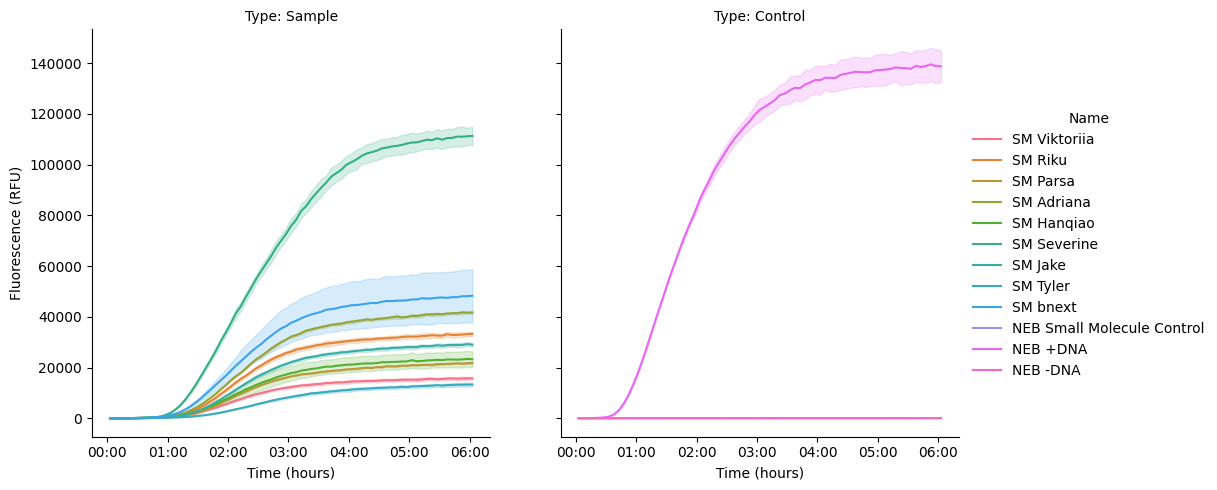

In [6]:
#| label: fig:day1-kinetics

ctrl_data = data[data["Type"]=="Control"]
exp_data = data[data["Type"] !="Standard"]

pr.plot_curves(exp_data, col="Type");

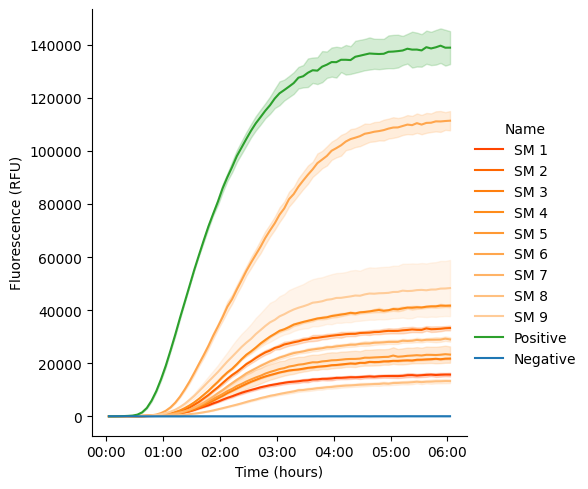

In [27]:
#| label: fig:day1-kinetics-all

exp_data = data[data["Type"] !="Standard"]

names_to_remove = ['NEB Small Molecule Control']

replace_dict = {'SM Viktoriia':'SM 1',
                'SM Riku':'SM 2',
                'SM Parsa':'SM 3',
                'SM Adriana':'SM 4',
                'SM Hanqiao':'SM 5',
                'SM Severine':'SM 6',
                'SM Jake':'SM 7',
                'SM Tyler':'SM 8',
                'SM bnext':'SM 9',
                'NEB +DNA':'Positive',
                'NEB -DNA':'Negative'
               }

custom_order = ['no Folinic Acid', 
                'Folinic Acid', 
                'Folinic Acid + MTHFS', 
                '5,10-methenyl-THF', 
                'Positive', 
                'Negative']

color_map = {'SM 1':'#ff4500',
             'SM 2':'#ff6600',
             'SM 3':'#ff7f0e',
             'SM 4':'#ff8c1a',
             'SM 5':'#ff9933',
             'SM 6':'#ffa64d',
             'SM 7':'#ffb366',
             'SM 8':'#ffc080',
             'SM 9':'#ffcc99',
             'Positive':'#2ca02c',
             'Negative':'#1f77b4'
            }

data_drop = exp_data.drop(exp_data[exp_data['Name'].isin(names_to_remove)].index)
data_drop['Name'] = data_drop['Name'].replace(replace_dict)

pr.plot_curves(data_drop, palette=color_map);

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.



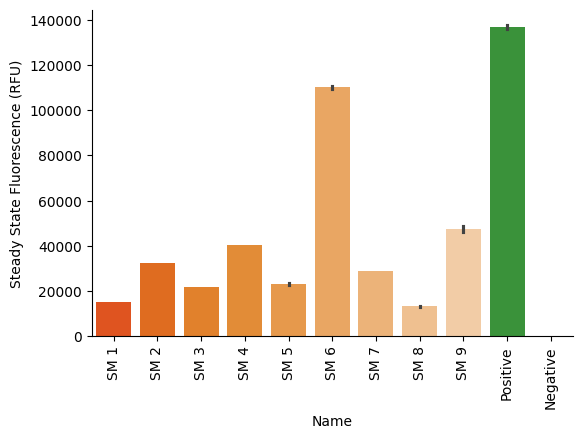

In [28]:
#| label: fig:day1-endpoint

ctrl_data = data[data["Type"]=="Control"]
exp_data = data[data["Type"] !="Standard"]

pr.plot_steadystate(data_drop, palette=color_map);

In [ ]:
#| label: fig:day1-kinetics
ctrl_data = data[data["Type"]=="Control"]
exp_data = data[data["Type"] !="Standard"]

pr.plot_curves(exp_data, col="Type");

# Kinetics Analysis
These functions calculate key kinetic parameters of the time series.

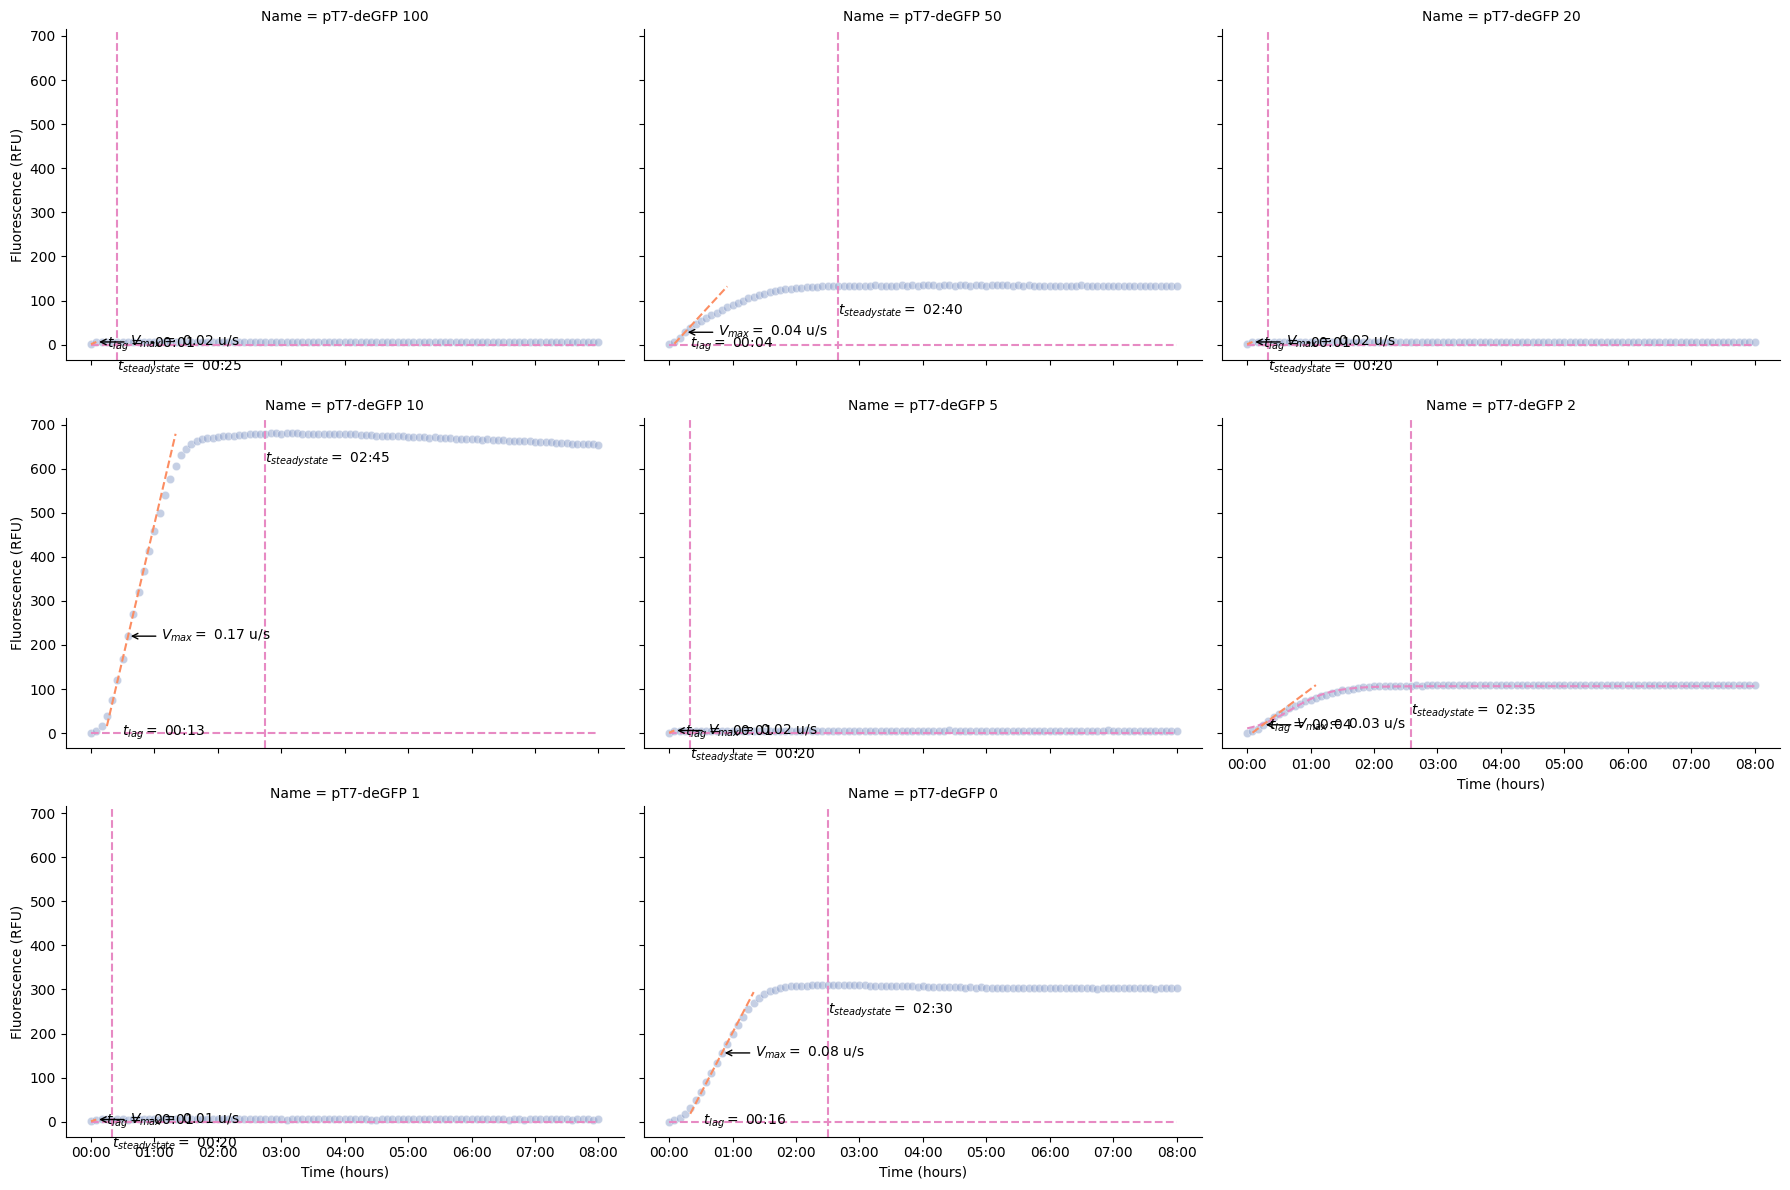

In [24]:
pr.plot_kinetics(data)

We can also calculate the kinetics and display the parameters as a table.

In [25]:
pr.kinetic_analysis(data)

Velocity              \
                                            Time   Data  Max   
Well Name          Read                                        
B1   pT7-deGFP 100 485/20,528/20 0 days 00:05:00   6.00 0.02   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:15:00  28.00 0.04   
B3   pT7-deGFP 20  485/20,528/20 0 days 00:05:00   6.00 0.02   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:35:00 220.00 0.17   
B5   pT7-deGFP 5   485/20,528/20 0 days 00:05:00   6.00 0.02   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:15:00  19.00 0.03   
B7   pT7-deGFP 1   485/20,528/20 0 days 00:05:00   5.00 0.01   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:50:00 156.00 0.08   

                                                       Lag        \
                                                      Time  Data   
Well Name          Read                                            
B1   pT7-deGFP 100 485/20,528/20         -1 days +23:59:00  0.00   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:04:13.846153846  0.00   
B3   pT7-deGFP 20  485/20,528/20         -1 days +23:59:00  0.00   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:13:25.882352941  0.00   
B5   pT7-deGFP 5   485/20,528/20         -1 days +23:59:00  0.00   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:04:26.666666667 13.38   
B7   pT7-deGFP 1   485/20,528/20         -1 days +23:58:45  0.00   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:16:05.217391304  0.00   

                                    Steady State           Fit               
                                            Time   Data      L    k      x0  
Well Name          Read                                                      
B1   pT7-deGFP 100 485/20,528/20 0 days 00:25:00   6.00   0.00 0.00    0.00  
B2   pT7-deGFP 50  485/20,528/20 0 days 02:40:00 132.00   0.00 0.00    0.00  
B3   pT7-deGFP 20  485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B4   pT7-deGFP 10  485/20,528/20 0 days 02:45:00 679.00   0.00 0.00    0.00  
B5   pT7-deGFP 5   485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B6   pT7-deGFP 2   485/20,528/20 0 days 02:35:00 108.00 106.53 0.00 2482.26  
B7   pT7-deGFP 1   485/20,528/20 0 days 00:20:00   5.00   0.00 0.00    0.00  
B8   pT7-deGFP 0   485/20,528/20 0 days 02:30:00 310.00   0.00 0.00    0.00